In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = r"C:\Jave\Seasonality\dataset\001410060001_001410040000000013.csv"

In [3]:
df = pd.read_csv(data_path)
df.head()

,date,month,days,week_day,is_holiday_ever,quantity
0,2017-11-25,11,25,5,0,0.0
1,2017-11-26,11,26,6,0,0.0
2,2017-11-27,11,27,0,0,2.0
3,2017-11-28,11,28,1,0,0.0
4,2017-11-29,11,29,2,0,10.0


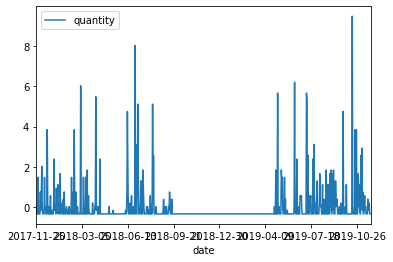

In [19]:
df.plot(x = 'date', y = 'quantity')

In [5]:
features_numericas = ['quantity']
scaled_features = {}
for item in features_numericas:
    mean, std = df[item].mean(), df[item].std()
    scaled_features[item] = [mean, std]
    df.loc[:, item] = (df[item] - mean)/std

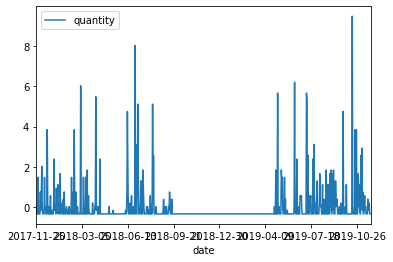

In [6]:
df.plot(x = 'date', y = 'quantity')

In [7]:
dummy_fields = ['month', 'days', 'week_day']

In [8]:
for each in dummy_fields:
    dummies = pd.get_dummies(df[each], prefix = each, drop_first = False)
    df = pd.concat([df, dummies], axis = 1)

In [9]:
colunas_para_deletar = ['month', 'days', 'week_day', 'date']

In [10]:
data = df.drop(colunas_para_deletar, axis = 1)
data.head()

,is_holiday_ever,quantity,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,days_29,days_30,days_31,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6
0,0,-0.338587,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,-0.338587,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.024823,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,-0.338587,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1.478462,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [11]:
test_data = data[-21:]
data = data[:-21]

In [12]:
target_fields = ['quantity']
features, targets = data.drop(target_fields, axis = 1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis = 1), test_data[target_fields]

In [13]:
train_features, train_targets = features[:-60], targets[:-60]
val_features, val_targets = features[-60:], targets[-60:]
print(train_features, train_targets)
print(val_features, val_targets)

     is_holiday_ever  month_1  month_2  month_3  month_4  month_5  month_6  \
0                  0        0        0        0        0        0        0   
1                  0        0        0        0        0        0        0   
2                  0        0        0        0        0        0        0   
3                  0        0        0        0        0        0        0   
4                  0        0        0        0        0        0        0   
..               ...      ...      ...      ...      ...      ...      ...   
646                0        0        0        0        0        0        0   
647                0        0        0        0        0        0        0   
648                0        0        0        0        0        0        0   
649                1        0        0        0        0        0        0   
650                1        0        0        0        0        0        0   

     month_7  month_8  month_9  ...  days_29  days_30  days_31 

In [14]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate, verbose = False):
        
        # Defina o número de nós nas camadas de entrada, oculta e de saída.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Inicializando os pesos
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        self.verbose = verbose 
        
        if self.verbose:
            print("Rede Neural iniciada com:\ninput_nodes: {}\nhidden_nodes: {}\noutput_nodes: {}\nlearning_rate: {}\n".format(
                self.input_nodes, self.hidden_nodes, self.output_nodes, self.lr
            ))
        
        self.hidden_layer_activation_function = lambda x: 1 / (1 + np.exp(-x))
        self.hidden_layer_derivate_activation_function = lambda sigmoid: sigmoid * (1 - sigmoid)
        self.output_layer_activation_function = lambda x: x 
        self.output_layer_derivate_activation_function = lambda x: 1 
        
        # Ativação
        self.activation_function = self.hidden_layer_activation_function 
    
    def forward_pass(self, inputs):
        
        # Forward pass #
        
        # Sinais da camada de entrada
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs) 
        
        # Sinais da camada oculta
        hidden_outputs = self.hidden_layer_activation_function(hidden_inputs) 
        
        # Sinais na camada de saída final
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs) 
        final_outputs = self.output_layer_activation_function(final_inputs)
        return [hidden_inputs, hidden_outputs, final_inputs, final_outputs]
    
    def backward_pass(self, inputs, targets, hidden_inputs, hidden_outputs, final_inputs, final_outputs):
        
        # Backward pass #
        output_errors = targets - final_outputs
        output_grad = self.output_layer_derivate_activation_function(final_outputs)
        
        # Backpropagated error
        
        # Erros propagados para a camada oculta
        hidden_errors = output_errors * output_grad * self.weights_hidden_to_output 
        hidden_grad = self.hidden_layer_derivate_activation_function(hidden_outputs)
            
        return [output_errors, hidden_errors, hidden_grad, output_grad]

    def train(self, inputs_list, targets_list):
        
        # Converta a lista de entradas para a matriz 2d
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs, hidden_outputs, final_inputs, final_outputs = self.forward_pass(inputs)
        output_errors, hidden_errors, hidden_grad, output_grad = self.backward_pass(inputs, targets, hidden_inputs, hidden_outputs, final_inputs, final_outputs)

        # Atualização de pesos para saída com passo de descida de gradiente
        self.weights_hidden_to_output += self.lr * np.dot(output_errors * output_grad, hidden_outputs.T) 
        self.weights_input_to_hidden += self.lr * np.dot(hidden_errors.T * hidden_grad, inputs.T)
 
    def run(self, inputs_list):
        # Executa um passo para a frente pela rede
        inputs = np.array(inputs_list, ndmin = 2).T
        
        _, _, _, final_outputs = self.forward_pass(inputs)
        return final_outputs

In [15]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [16]:
import sys

epochs = 10000
learning_rate = 0.1
hidden_nodes = 27
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate, True)

losses = {'train':[], 'validation':[]}

for e in range(epochs):
    # Percorrer um lote aleatório de 128 registros do conjunto de dados de treinamento
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.iloc[batch].values, 
                              train_targets.iloc[batch]['quantity']):
        network.train(record, target)
    
    # Imprimir o progresso do treinamento
    train_loss = MSE(network.run(train_features), train_targets['quantity'].values)
    
    val_loss = MSE(network.run(val_features), val_targets['quantity'].values)
    
    sys.stdout.write("\rProgresso: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Erro no Treinamento: " + str(train_loss)[:5] \
                     + " ... Erro na Validação: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Rede Neural iniciada com:
input_nodes: 51
hidden_nodes: 27
output_nodes: 1
learning_rate: 0.1

Progresso: 99.9% ... Erro no Treinamento: 1.548 ... Erro na Validação: 5.379

(-0.2700563213939655, 0.5)

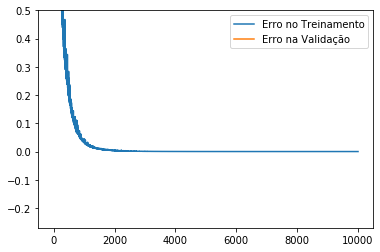

In [17]:
plt.plot(losses['train'], label = 'Erro no Treinamento')
plt.plot(losses['validation'], label = 'Erro na Validação')
plt.legend()
plt.ylim(ymax = 0.5)

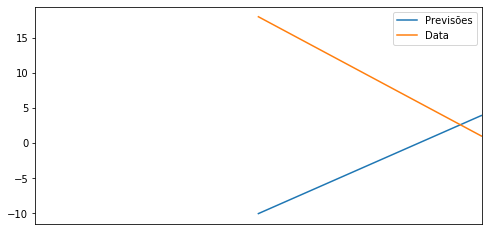

In [18]:
fig, ax = plt.subplots(figsize = (8,4))

mean, std = scaled_features['quantity']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label = 'Previsões')
ax.plot((test_targets['quantity']*std + mean).values, label='Data')
ax.set_xlim(right = len(predictions))
ax.legend()

dates = pd.to_datetime(df.iloc[test_data.index]['date'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)